# Covariance matrix examples

I show some examples on how to define a covariance matrix and how does the noise looks like for such a matrix.

Each time with different sample sizes.

To generate noise as well as to use in the MCMC code, we need the *inverse* of the covariance matrix. 

In [1]:

# Change to 
import os
import sys
sys.path.insert(0, os.path.abspath('../../../sealevel'))

# Imports
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

from mcmc import covariance_matrix as cov

### Case of a diagonal matrix

In [2]:
n1 = 100
n2 = 1000
sigma = 1
mean=np.zeros(n1)
# This defines directly the inverse covariance
icovar1 = cov.icovar_diagonal(n1, sigma)

covar1 = linalg.inv(icovar1)

noise1 = np.random.multivariate_normal(mean, covar1, 1).flatten()
noise2 = np.random.multivariate_normal(mean, covar1, 10).flatten()


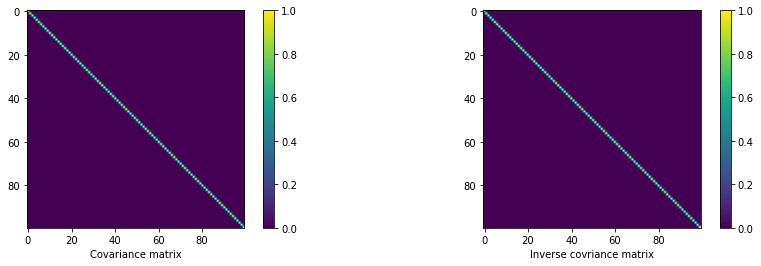

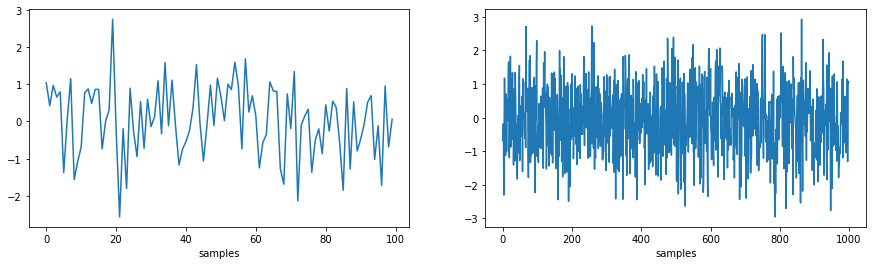

In [3]:
fig_size = (2.5, 1.)

fig, (ax1, ax2) = plt.subplots(1, 2)

im1 = ax1.imshow(covar1)
ax1.set_xlabel("Covariance matrix")
cbar1 = fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(icovar1)
ax2.set_xlabel("Inverse covriance matrix")
cbar2 = fig.colorbar(im2, ax=ax2)
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(noise1)
ax1.set_xlabel("samples")
ax2.plot(noise2)
ax2.set_xlabel("samples")
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)

### Case of correlated Gaussian noise with laplacian kernel

In [4]:
n1 = 100
n2 = 1000
sigma = 1
mean=np.zeros(n1)
# Amplitude:
sigma = 1
# Correlation length
corr_l = 10
# Define the length between two samples (in meters)
dx = 1
# Exponent in the kernel. 1 for laplacian, 2 for gaussian
gamma = 1

# Define the covariance
covar1 = cov.exponential_covar_1d(
    n1, sigma, corr_l, dx=dx, gamma=gamma, truncate=None)
    
# This computes the inverse covariance
icovar1 = linalg.inv(covar1)

noise1 = np.random.multivariate_normal(mean, covar1, 1).flatten()


# Test if more samples in the data
dx=0.1  # 10 times more points hence smaller dx
mean=np.zeros(n2)

covar2 = cov.exponential_covar_1d(
    n2, sigma, corr_l, dx=dx, gamma=gamma, truncate=None)

# This computes the inverse covariance
icovar2 = linalg.inv(covar2)

noise2 = np.random.multivariate_normal(mean, covar2, 1).flatten()


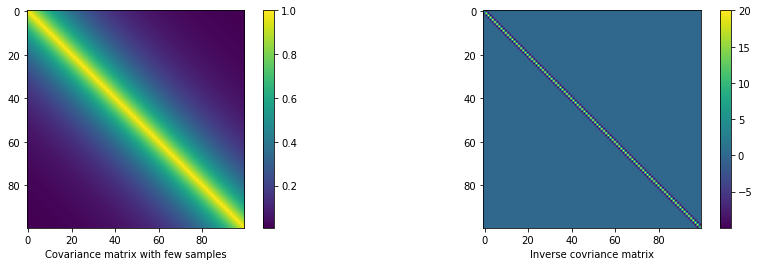

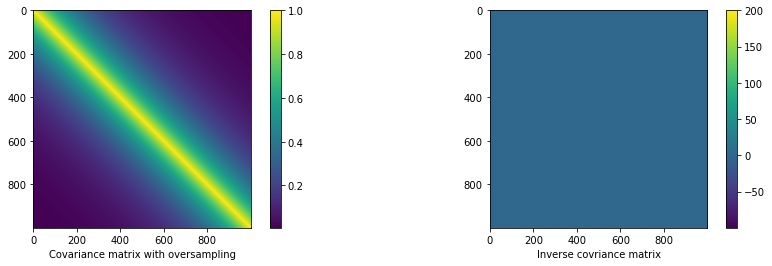

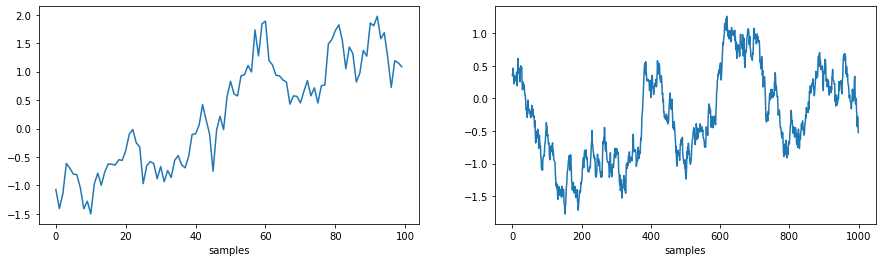

In [5]:
fig_size = (2.5, 1.)

fig, (ax1, ax2) = plt.subplots(1, 2)

im1 = ax1.imshow(covar1)
ax1.set_xlabel("Covariance matrix with few samples")
cbar1 = fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(icovar1)
ax2.set_xlabel("Inverse covriance matrix")
cbar2 = fig.colorbar(im2, ax=ax2)
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)


fig, (ax1, ax2) = plt.subplots(1, 2)

im1 = ax1.imshow(covar2)
ax1.set_xlabel("Covariance matrix with oversampling")
cbar1 = fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(icovar2)
ax2.set_xlabel("Inverse covriance matrix")
cbar2 = fig.colorbar(im2, ax=ax2)
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(noise1)
ax1.set_xlabel("samples")
ax2.plot(noise2)
ax2.set_xlabel("samples")
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)

### Case of correlated Gaussian noise with gaussian kernel

In [9]:
n1 = 100
n2 = 1000
sigma = 1
mean=np.zeros(n1)
# Amplitude:
sigma = 10
# Correlation length
corr_l = 10
# Define the length between two samples (in meters)
dx = 1
# Exponent in the kernel. 1 for laplacian, 2 for gaussian
gamma = 2

# Define the covariance
covar1 = cov.exponential_covar_1d(
    n1, sigma, corr_l, dx=dx, gamma=gamma, truncate=None)

# This computes the inverse covariance
icovar1 = linalg.inv(covar1)

noise1 = np.random.multivariate_normal(mean, covar1, 1).flatten()


# Test if more samples in the data
dx=0.1  # 10 times more points hence smaller dx
mean=np.zeros(n2)

covar2 = cov.exponential_covar_1d(
    n2, sigma, corr_l, dx=dx, gamma=gamma, truncate=None)

# This computes the inverse covariance
icovar2 = linalg.inv(covar2)

noise2 = np.random.multivariate_normal(mean, covar2, 1).flatten()

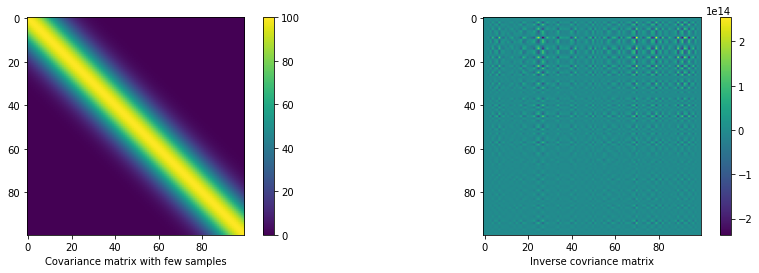

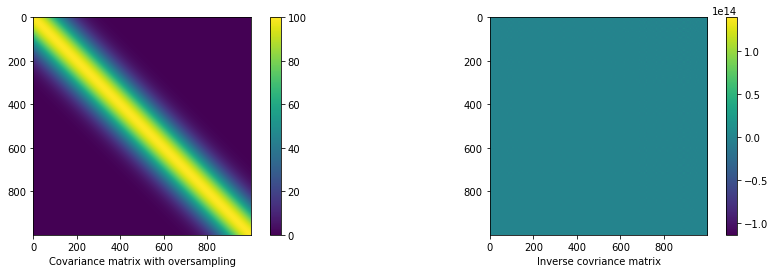

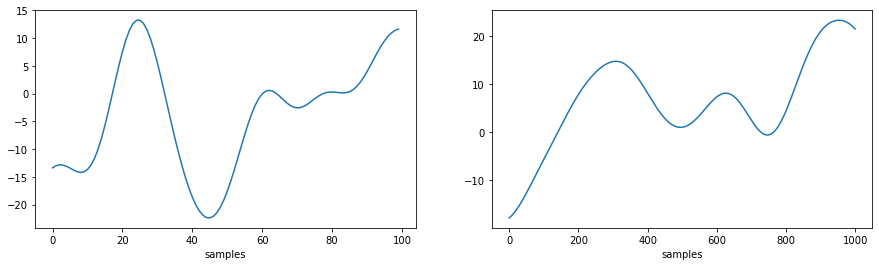

In [10]:
fig_size = (2.5, 1.)

fig, (ax1, ax2) = plt.subplots(1, 2)

im1 = ax1.imshow(covar1)
ax1.set_xlabel("Covariance matrix with few samples")
cbar1 = fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(icovar1)
ax2.set_xlabel("Inverse covriance matrix")
cbar2 = fig.colorbar(im2, ax=ax2)
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)


fig, (ax1, ax2) = plt.subplots(1, 2)

im1 = ax1.imshow(covar2)
ax1.set_xlabel("Covariance matrix with oversampling")
cbar1 = fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(icovar2)
ax2.set_xlabel("Inverse covriance matrix")
cbar2 = fig.colorbar(im2, ax=ax2)
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(noise1)
ax1.set_xlabel("samples")
ax2.plot(noise2)
ax2.set_xlabel("samples")
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)

### Add two noise models 

In [13]:
dx=1.
mean=np.zeros(n1)

# First matrix: the physical model error
covar1 = cov.exponential_covar_1d(
    n1, sigma, corr_l, dx=dx, gamma=gamma, truncate=None)

# Second one, measurement error
eps1 = 1e-1*sigma*np.identity(n1)

# This computes the inverse covariance
icovar1 = linalg.inv(covar1 + eps1)

noise1 = np.random.multivariate_normal(mean, covar1 + eps1, 1).flatten()


# Test if more samples in the data
dx=0.1  # 10 times more points hence smaller dx
mean=np.zeros(n2)

covar2 = cov.exponential_covar_1d(
    n2, sigma, corr_l, dx=dx, gamma=gamma, truncate=None)
eps2 = 1e-1*sigma*np.identity(n2)

# This computes the inverse covariance
icovar2 = linalg.inv(covar2 + eps2)

noise2 = np.random.multivariate_normal(mean, covar2 + eps2, 1).flatten()

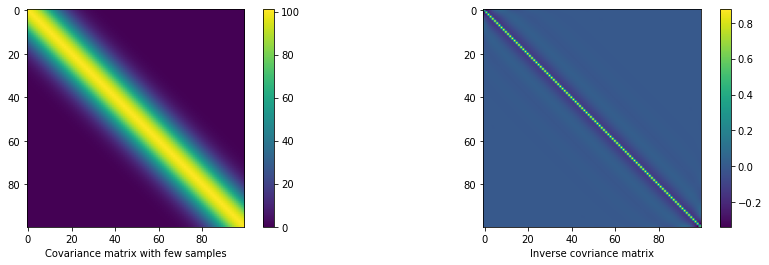

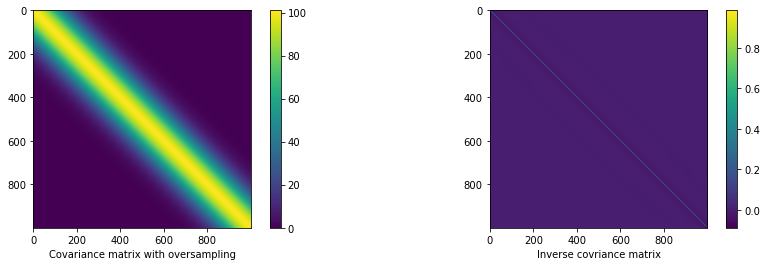

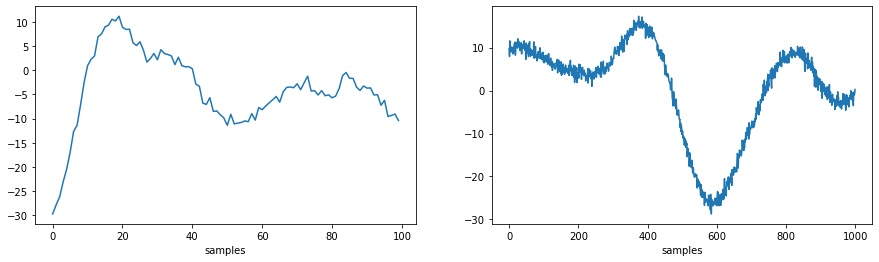

In [14]:
fig_size = (2.5, 1.)

fig, (ax1, ax2) = plt.subplots(1, 2)

im1 = ax1.imshow(covar1 + eps1)
ax1.set_xlabel("Covariance matrix with few samples")
cbar1 = fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(icovar1)
ax2.set_xlabel("Inverse covriance matrix")
cbar2 = fig.colorbar(im2, ax=ax2)
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)


fig, (ax1, ax2) = plt.subplots(1, 2)

im1 = ax1.imshow(covar2 + eps2)
ax1.set_xlabel("Covariance matrix with oversampling")
cbar1 = fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(icovar2)
ax2.set_xlabel("Inverse covriance matrix")
cbar2 = fig.colorbar(im2, ax=ax2)
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(noise1)
ax1.set_xlabel("samples")
ax2.plot(noise2)
ax2.set_xlabel("samples")
default_size = fig.get_size_inches()
fig.set_size_inches((default_size[0]*fig_size[0],
                     default_size[1]*fig_size[1]), forward=True)